/tmp/ipykernel_1822322/3319552035.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='value', data=data, palette=palette)
/tmp/ipykernel_1822322/3319552035.py:58: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.boxplot(x='category', y='value', data=data, palette=palette)


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0')])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

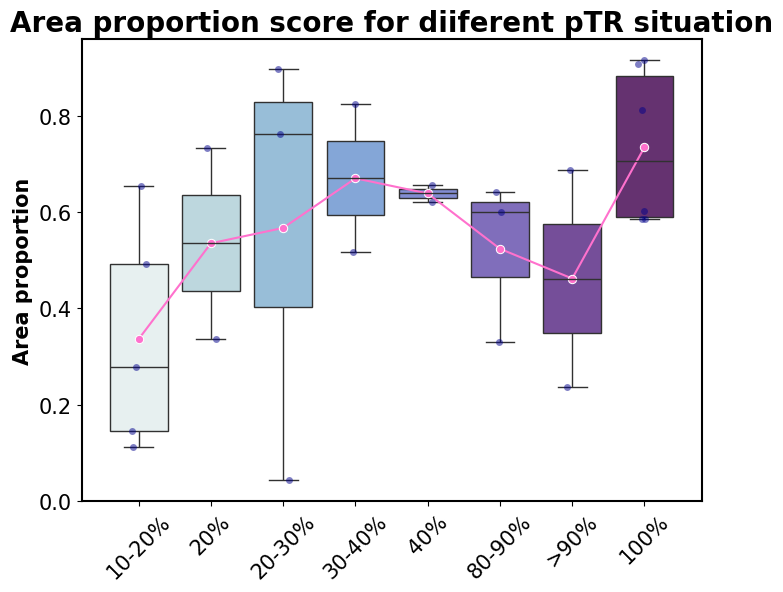

In [1]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import scanpy as sc 
import numpy as np

import pandas as pd 
import seaborn as sns

from scipy.stats import mannwhitneyu

train_adata = sc.read_h5ad('/home/cuiyan/mms/CODEX_hnc_s.h5ad')

batch_obs = 'slice'
ct_obs = 'cell_type'


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15


x = []
y  = []

for s in train_adata[train_adata.obs['condition'] == 1].obs[batch_obs].unique():
    adata_ = train_adata[train_adata.obs[batch_obs] == s].copy()
    X = adata_.obs['new_labels'].astype(int).sum() / adata_.shape[0] 
    x.append(X)
    y.append(adata_.obs['pTR_max'].values[0])


label = ['80-90%', '10-20%', '20%', '40%', '100%', '20-30%', '>90%', '30-40%']
rank =  [5,0,1,4,7,2,6,3]
draw_label = ['10-20%', '20%', '20-30%', '30-40%', '40%', '80-90%', '>90%', '100%']
y_test= [rank[label.index(i)] for i in y]

y = y_test


import numpy as np


data = pd.DataFrame({'value' : x,
                     'category': y,
                     })

import palettable
from matplotlib.colors import  ListedColormap
palette =  palettable.cmocean.sequential.Dense_10.mpl_colors


plt.figure(figsize=(8, 6))

sns.boxplot(x='category', y='value', data=data, palette=palette)
sns.stripplot(x='category', y='value', data=data, color='darkblue', jitter=True, alpha=0.5)

# Calculating mean values for each category
mean_values = data.groupby('category')['value'].mean().reset_index()

# Lineplot for mean values
sns.lineplot(x='category', y='value', data=mean_values, marker='o', color='#FF71CD', sort=False)

plt.title('Area proportion score for diiferent pTR situation')
plt.ylabel('Area proportion')
plt.xlabel('')
draw_label = ['10-20%', '20%', '20-30%', '30-40%', '40%', '80-90%', '>90%', '100%']
plt.xticks(range(len(label)), draw_label, rotation=45, fontsize=15)
plt.yticks(fontsize=15)

In [1]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import scanpy as  sc 

import pandas as pd 
import seaborn as sns

from scipy.stats import mannwhitneyu
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15


train_adata = sc.read_h5ad('/home/cuiyan/mms/CODEX_hnc_l.h5ad')


x = []
y = []
lens = []
events = []
for s in train_adata[train_adata.obs['condition'] == 1].obs[batch_obs].unique():
    adata_ = train_adata[train_adata.obs[batch_obs] == s]
    if np.isnan(adata_.obs['recurred'].values).sum() == 0:
        X = adata_.obs['new_labels'].astype(int).sum() / adata_.shape[0]
        x.append(X)
        lens.append(adata_.obs['survival_day'].values[0])
        y.append(adata_.obs['recurred'].values[0])
        events.append(adata_.obs['hpvstatus'].values[0])



y_true = [i == 1  for i in events]


x_0 = x


from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Colors for each ROC curve
colors = ['#FF5DA2']
labels = ['Taichi area fraction score']

# Create the figure once
plt.figure(figsize=(8, 6))

# Loop through x_0, x_1, x_2 and plot ROC curves
for i, y_scores in enumerate([x_0]):

    # Calculate ROC Curve and ROC AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each set of scores
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{labels[i]} ROC curve (area = {roc_auc:.2f})', alpha=0.7)

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set limits, labels, and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for HPV infection situation')

# Display the legend showing AUC for each curve
plt.legend(loc="lower right")

# Format ticks and display the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


# Show the plot
plt.show()




NameError: name 'batch_obs' is not defined

In [5]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

import pandas as pd 
import seaborn as sns

from scipy.stats import mannwhitneyu


#plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15


train_adata = sc.read_h5ad('/home/cuiyan/mms/CODEX_dead.h5ad')


x = []
y = []
y_1 = []
lens = []
events = []
for s in train_adata[train_adata.obs['condition'] == 1].obs[batch_obs].unique():
    adata_ = train_adata[train_adata.obs[batch_obs] == s]
    X = adata_.obs['new_labels'].astype(int).sum() 
    x.append(X)
    lens.append(adata_.obs['length_of_disease_free_survival'].values[0])
    y.append(adata_.obs['recurrence'].values[0])
    y_1.append(adata_.obs['primary_outcome'].values[0])
    events.append(adata_.obs['alive_or_deceased'].values[0])




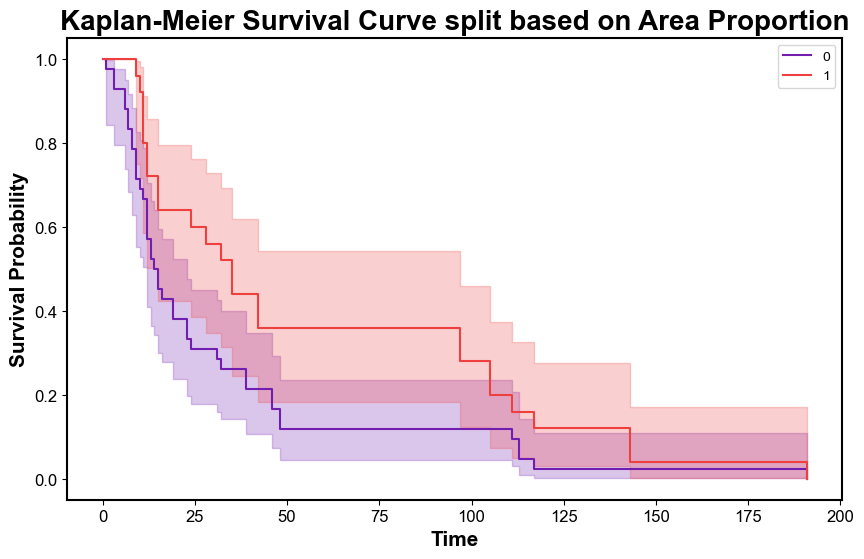

Log-Rank Test p-value: 0.042995675527470426
4.095572147245649


In [6]:
import pandas as pd
import numpy as np 

duration = np.array(lens)
index = ~np.isnan(duration)
duration = duration[index]
values = np.array(x)[index]
#groups = values
groups = values > np.mean(values)
event = np.array(events)[index]

# 示例数据
data = {
    'group': groups.astype(int),
    'duration': duration,
    'event':(event == 'Dead').astype(int)
}

df = pd.DataFrame(data)


from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# 初始化KaplanMeierFitter对象
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(figsize=(10, 6))  # Change figure size as needed

# Loop through each group
colors = {0: '#711DB0', 1: '#EF4040'}  # Define colors for each group
for name, grouped_df in df.groupby('group'):
    # Fit data
    kmf.fit(grouped_df['duration'], grouped_df['event'], label=name)
    # Plot survival curve with specified color
    kmf.plot_survival_function(ax=ax, color=colors[name])

plt.title('Kaplan-Meier Survival Curve split based on Area Proportion')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
#plt.savefig(f'/home/cy/mms/eps_figure/fig_5_codex_survival_curve.eps', bbox_inches='tight', pad_inches=0, format='eps')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Separating the two groups for Log-Rank test
group_A = df[df['group'] == 1]
group_B = df[df['group'] == 0]

results = logrank_test(group_A['duration'], group_B['duration'], event_observed_A=group_A['event'], event_observed_B=group_B['event'])
print('Log-Rank Test p-value:', results.p_value)
print(results.test_statistic)
